In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import calendar

# Walt Disney World Wait Times - Explainer Notebook 

## Motivation 

**The dataset:**

Our dataset consists of 7 attractions datasets that each contain the waiting time for an attraction at a certain timestamp. These datasets contains information mainly in the period 2013-2019. Some attractions have only got data for a smaller period of time as they opened in the later years.

The columns in these datasets are: date, datetime, SPOSTMIN, SACTMIN. Date and datetime are the date and the time of the observation. SPOSTMIN is the estimated wait time and SACTMIN is the actual wait time. SACTMIN is not very useful as the number of observations is very small compared to the estimated wait time.

For the attraction data and metadata there is a dictionary file which contains more information about each column in those files.

In relation to these attraction-datasets we also have a metadata set with information about the parks in Walt Disney World. This set contains information from 1st of January 2012 and is updated regularly with each passing month. Metadata includes, but is not limited to: seasons, opening hours, temperature, parades information. 

We have also created a ticket price dataset after doing some research. This dataset have information about the price of a ticket to parks inside Walt Disney World from 2012 to 2019. As the ticket system was changed in 2016 a tier column is also available.

Last we have a dataset with precipitation in the period 1st of January 2012 to 31st of December 2017. This data set contains daily measurement of the precipitation collected by a weather station in Orlando, Florida.


**Why we chose this/these datasets:**

We chose these datasets as we see potential connections between how much time is spent waiting in line for attraction and the weather or the price tag of the entrance fee. We wanted to explore if any correlation could be found between these factors as we hypothesized that waiting time might diminish as parades started or the weather got worse. By having several attractions we also allow the user to look at attractions that might interest them the most. With ticket prices we also allowed users to see the development in price and how much they can expect to pay based on earlier years.

**The goal for the end user's experience:**

Our goal was to create a website where users who wants to go Disney World can go and see how much time and money they can expect to use. We wanted to allow users to browse through previous data which could then decide on when they should visit Disney World. By creating monthly, weekly and daily wait time plots we wanted to allow the user to go from a wide perspective down to the exact date they might want to visit, based on previous years’ data. With precipitation and temperature the user would also be able to see what kind of weather to expect and if it had any influence on the waiting time. All this information would be useful as many probably only visit Disney World once or twice and it should therefore be as fun as possible.

## Basic stats

First we load all our datasets into Python. 
Each attraction has its own dataset and we will combine these into a single dataframe called frame.

In [2]:
#Load attractions files into Python
rock = pd.read_csv("rock_n_rollercoaster.csv")
rock["attraction"] = "Rock N Rollercoaster"

In [3]:
dwarf = pd.read_csv("7_dwarfs_train.csv")
dwarf["attraction"] = "7 Dwarfs Train"

In [4]:
alien = pd.read_csv("alien_saucers.csv")
alien["attraction"] = "Alien Saucers"

In [5]:
pirates = pd.read_csv("pirates_of_caribbean.csv")
pirates["attraction"] = "Pirates of Caribbean"

In [6]:
toy_story = pd.read_csv("toy_story_mania.csv")
toy_story["attraction"] = "Toy Story Mania"

In [7]:
splash_mountain = pd.read_csv("splash_mountain.csv")
splash_mountain["attraction"] = "Splash Mountain"

In [8]:
slinky_dog = pd.read_csv("slinky_dog.csv")
slinky_dog["attraction"] = "Slinky Dog"

In [9]:
#Combine wait times for each park into one dataframe
frame = pd.concat([rock, alien, slinky_dog, toy_story, dwarf,pirates, splash_mountain])

Furthermore we have a metadata file containing Walt Disney World metadata and a rain file with the precipitation

In [10]:
#Load metadata file containing metadata about parks
metadata = pd.read_csv("metadata2.csv")

In [11]:
#Load rain file containing rainfall data
rain = pd.read_csv('Rain.csv')

Links to where datasets can be found:
* Disney World Data: https://touringplans.com/walt-disney-world/crowd-calendar#DataSets
* Rain: https://climatecenter.fsu.edu/climate-data-access-tools/downloadable-data
(The weather station used is: Orlando Intl AP)
* Ticket prices: http://allears.net/walt-disney-world/wdw-planning/wdw-ticket-increase-guide/

### Exploratory data analysis 

First we have chosen to create box plots for attraction wait times.
This allows us to see if there is any outliers in the data.

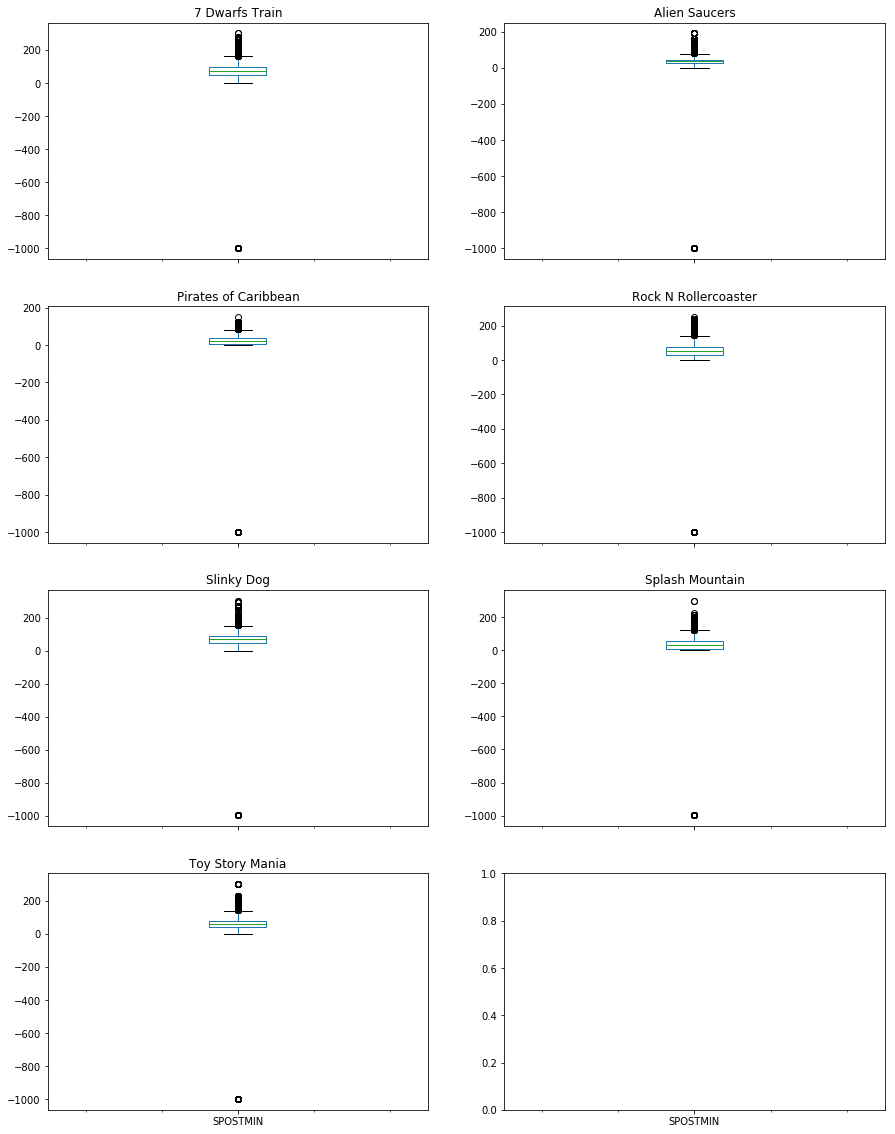

In [12]:
#Create boxplots for the wait time to find outliers
fig, axes = plt.subplots(4,2, figsize=(15,20), sharex=True)
for (attraction, group), ax in zip(frame.groupby(frame['attraction']), axes.flatten()):
    group.plot(x='date', y='SPOSTMIN', kind='box', ax=ax, title=attraction, legend=None)

The box plots have revealed that all attractions have outliers the heavly influence the datasets.
After researching these numbers we discovered that if an attraction has been closed it's wait time will be -999.
Therefor we want to exlude these observations. 

In [13]:
#Remove negative wait times as they indicates attraction closure
frame = frame[frame['SPOSTMIN'] > -1]

After cleaning the dataset, we create new boxplots, to see the distribution of our data.

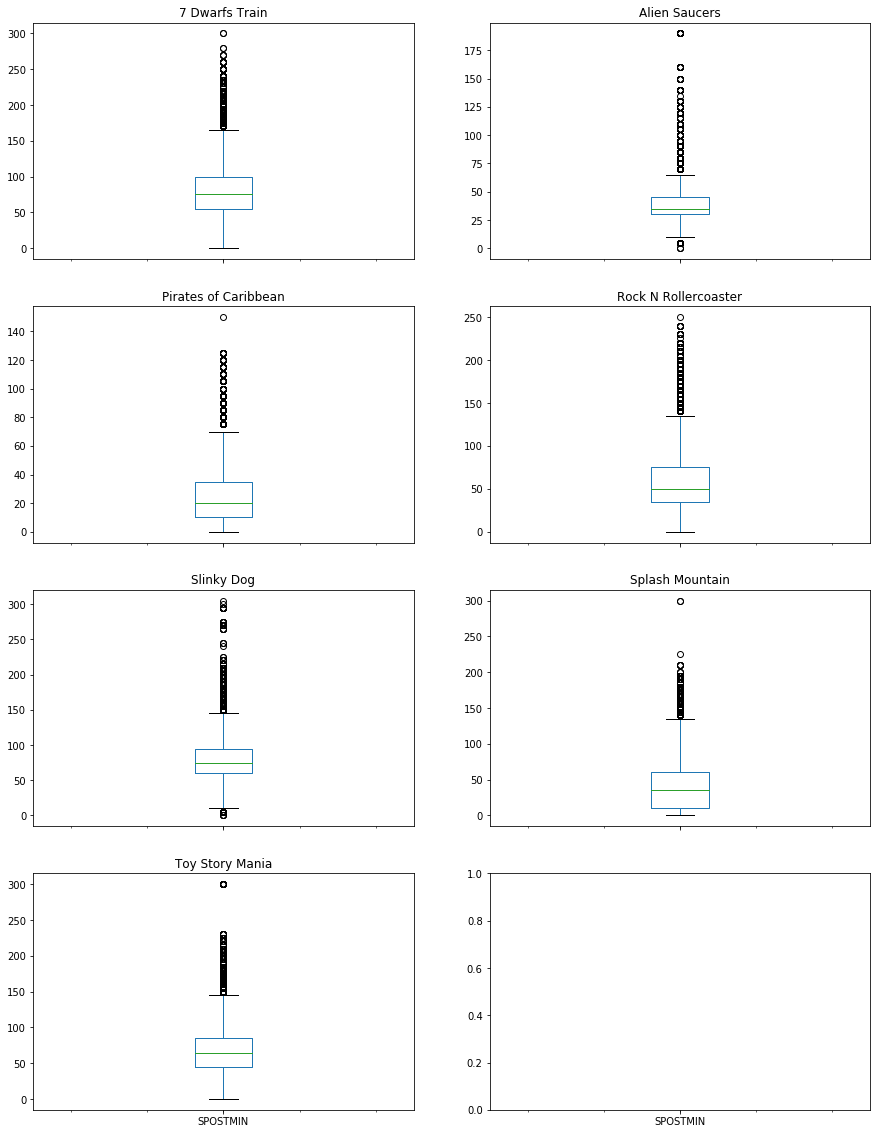

In [14]:
fig, axes = plt.subplots(4,2, figsize=(15,20), sharex=True)
for (attraction, group), ax in zip(frame.groupby(frame['attraction']), axes.flatten()):
    group.plot(x='date', y='SPOSTMIN', kind='box', ax=ax, title=attraction, legend=None)

Next we wish to see if there is any changes in the avarage wait time of the years. First we make histograms for each attraction over the years. To start we have to convert our date columns to a datetime value. And from this we can create a year column which is what we will need.

In [15]:
#Convert date values to datetime
frame['date'] = pd.to_datetime(frame['date'])
frame['datetime'] = pd.to_datetime(frame['datetime'])
frame['year'] = frame['date'].dt.year

In [16]:
hist = frame.groupby(['attraction', 'year']).mean()
hist = hist.reset_index()[['attraction', 'year', 'SPOSTMIN']]

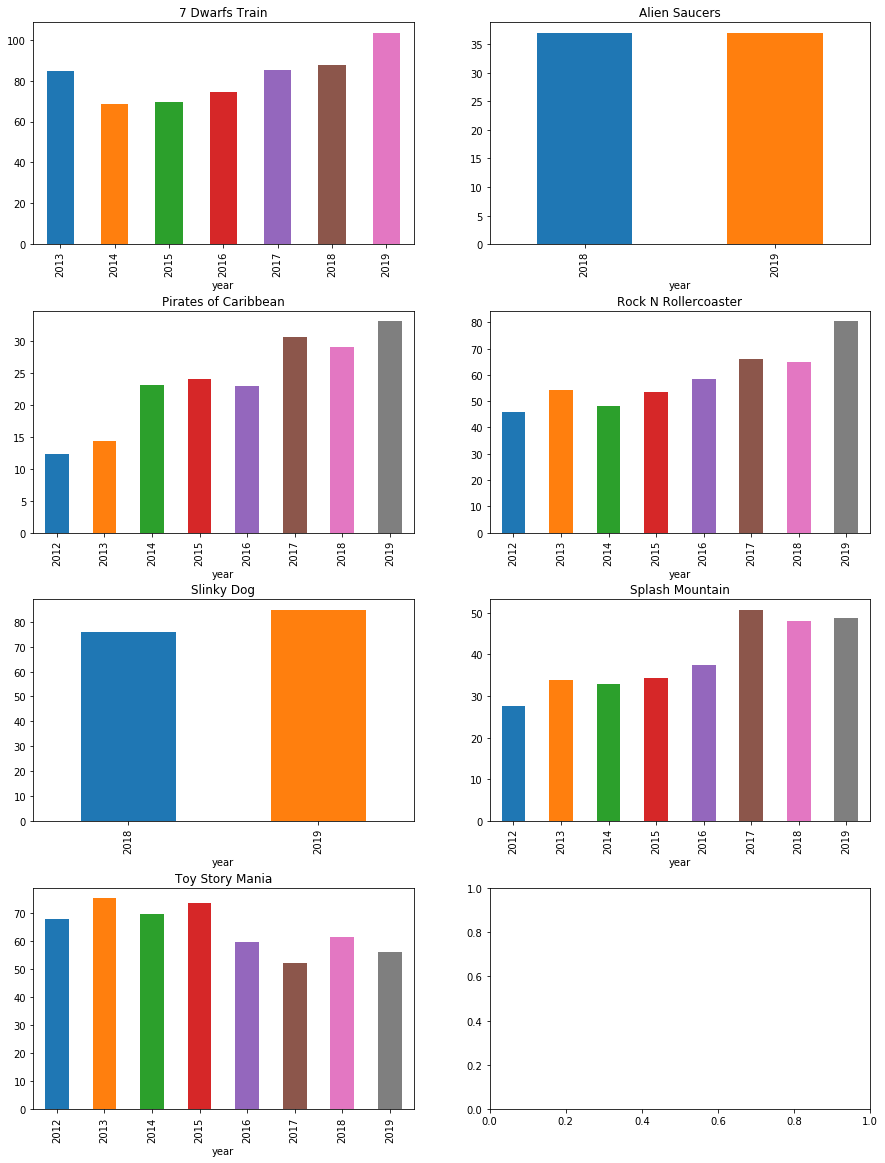

In [17]:
#Create histograms for each attraction
fig, axes = plt.subplots(4,2, figsize=(15,20), sharex=False)
fig.subplots_adjust(hspace=0.3)
for (attraction, group), ax in zip(hist.groupby(hist['attraction']), axes.flatten()):
    group.plot(x='year', y='SPOSTMIN', kind='bar', ax=ax, title=attraction, legend=None)

As we can see most attration's wait time is increasing over the years. 
It is hard to make any conclusions on Slinky Dog and Alien Saucers as they have only been opened for two years. 
Now we need to look into what could have an effect on these observations, a fun comparison could be to look the at ticket price for the entrance of the park.

In [18]:
ticket_price = pd.read_csv("Ticket Prices.csv")

Disney World changed their park tickets in 2016 from having only a regular ticket price to have both a peak, regular and value ticket price. These ticket tiers changed again in 2019 adding a holiday and low ticket price. To make a quick overview of the ticket prices we look only at the regular price as this tier has been there from 2012 to 2019. Prior to 2016 there were also a seperate price for each park - therefor we will take the mean of both parks for this graph. 

In [19]:
#Filter to only look at Regular tier prices
ticket_price = ticket_price[ticket_price['Tier'] == 'Regular']

In [20]:
#Group by year and find mean value. This is needed because of years prior to 2016
yearly_price = ticket_price.groupby(['Year']).mean()
yearly_price = yearly_price.reset_index()[['Year', '\nOne Day Price $']]

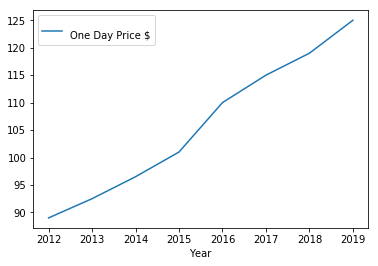

In [21]:
lines = yearly_price.plot.line(x='Year', y='\nOne Day Price $')

As we can see here the ticket prices are rising fast. This is not a contributing factor then to the rising wait time.

The average wait time from the bar plots could though still be misleading, if some months (and therefor years) has less observations than others. 
To explore this hypothesis we will now look at how many observations we have for each year.

In [22]:
hist2 = frame.groupby(['attraction', 'year']).count()
hist2 = hist2.reset_index()[['attraction', 'year', 'SPOSTMIN']]

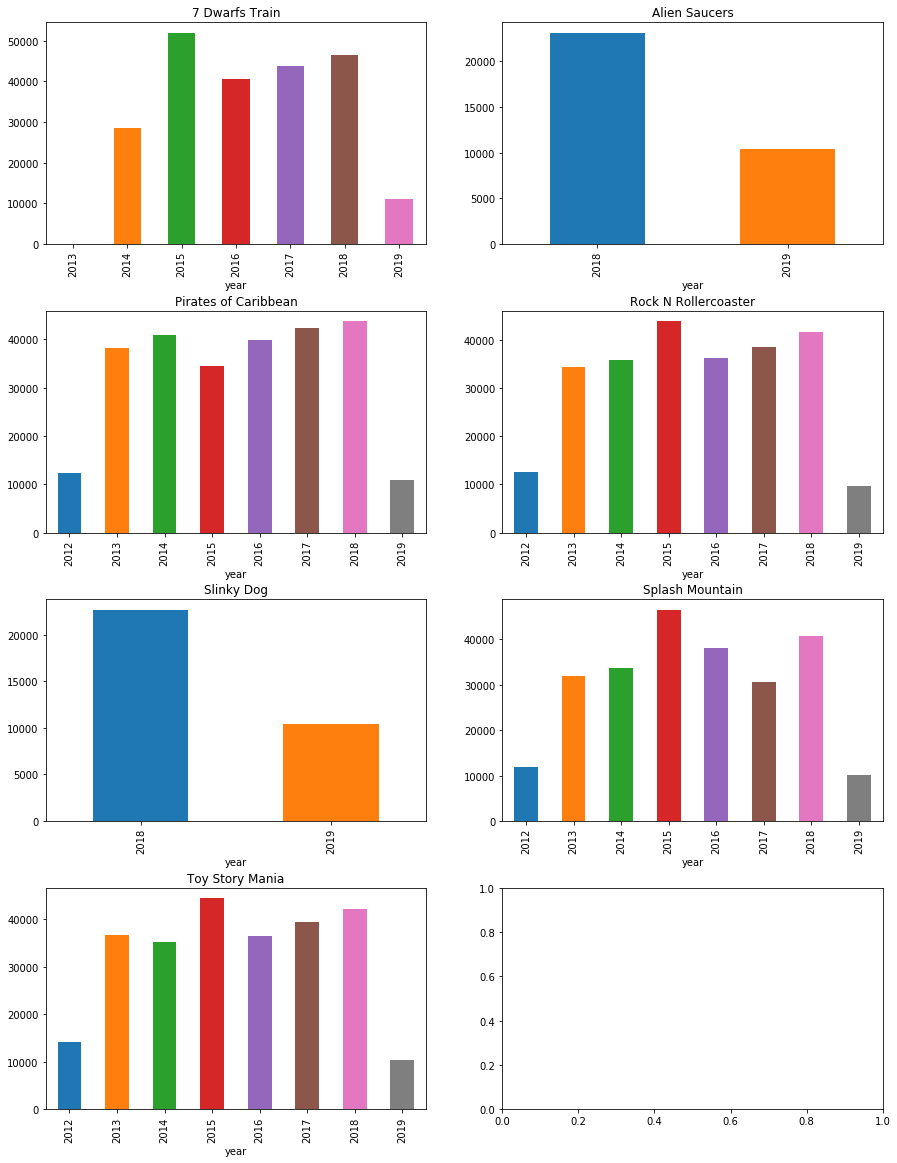

In [23]:
#Create histograms for each attraction
fig, axes = plt.subplots(4,2, figsize=(15,20), sharex=False)
fig.subplots_adjust(hspace=0.3)
for (attraction, group), ax in zip(hist2.groupby(hist2['attraction']), axes.flatten()):
    group.plot(x='year', y='SPOSTMIN', kind='bar', ax=ax, title=attraction, legend=None)

We can now see that the years 2012 and 2019 has very few observations in comparision to the others.
For 2019 this can be explained very easily as the year is still ongoing.
As for 2012 we can see that this is the earliest year which might suggest that they started the data collection here and therefore the observations is sparse.

From this conclusion we have decided to exlude the data from 2012 and 2019 as they give a misleading picture compared to the rest of data set.

In [24]:
#Remove 2012 and 2019 observations from the dataset
frame = frame[frame['date'].dt.year != 2012]
frame = frame[frame['date'].dt.year != 2019]

Next we need to clean our metadata file so it only contains data that we want to compare to the waiting times.
Factors that might have an impact on the waiting time could be parades as many park guests line up to see the parades, and therefor do not use the attractions. Another factor could be which season it is, and if it is a holiday season, as more people have free to go to Disney World. At last something that could affect the waiting time could be the weather. People might be less willing to wait in line deepending whether its hot or cold.
Based on this we have cleaned our meta data set:


In [25]:
#Reset index of metadata to only contain columns of value.
metadata = metadata.reset_index()[['DATE','WDW_TICKET_SEASON','WEEKOFYEAR','SEASON','HOLIDAYM','HOLIDAYN',
                                 'HOLIDAY','WDWSEASON','WDWMAXTEMP','WDWMINTEMP','WDWMEANTEMP',
                                 'SUNSET_WDW','MKOPEN','MKCLOSE','MKHOURS','HSOPEN','HSCLOSE',
                                 'HSHOURS','MKPRDDAY','MKPRDDT1','MKPRDDT2','MKPRDDN','MKPRDNGT',
                                 'MKPRDNT1','MKPRDNT2','MKPRDNN','MKFIREWK','MKFIRET1','MKFIRET2',
                                 'MKFIREN','HSPRDDAY','HSPRDDT1','HSPRDDN','HSFIREWK','HSFIRET1',
                                 'HSFIRET2','HSFIREN','HSSHWNGT','HSSHWNT1','HSSHWNT2','HSSHWNN']]

In [26]:
#We also clean away any data from 2012 & 2019.
#Cast DATE column to datetime
metadata['DATE'] = pd.to_datetime(metadata['DATE'])
metadata = metadata[metadata['DATE'].dt.year != 2012]
metadata = metadata[metadata['DATE'].dt.year != 2019]

Based on the rising ticket prices as well as the increase in wait time over the years we can conclude that more and more people visit Disney World each year (despite the prices). We can also see that Disney World are adding new attractions, which should spread people more, but this is not the case. We can therefor conclude that there is a need to make further analysis to see what actually affects the wait time for each attraction. With more and more visitors to Disney it might also be useful to have a place to go to find out what time of year is the best for visiting the park. 

## Data Analysis

In this section dataset for the Observable Notebook is created and prepared.
Datasets created are:
* daily_wait: Wait time for any given date in 2018
* weekly_wait: Average wait time on weekdays pr. month pr. year
* monthly_wait: Average wait time pr. month pr. year
* weather: Average temperature pr. month pr. year

In [27]:
#Create a function that can round a timestamp to nearest half hour
#Function
def round_time(time, round_to):
    """roundTo is the number of minutes to round to"""
    rounded = time + datetime.timedelta(minutes=round_to/2.)
    rounded -= datetime.timedelta(minutes=rounded.minute % round_to,
                                  seconds=rounded.second,
                                  microseconds=rounded.microsecond)
    return rounded

In [28]:
#Create copy of frame dataframe for wait time on any given date in 2018.
daily_wait = frame

In [29]:
#Convert extract time from datetime and round to nearest half hour
daily_wait['time'] = daily_wait['datetime'].apply(lambda x: round_time(x, 30))
daily_wait['time'] = pd.Series([val.time() for val in daily_wait['time']])

In [30]:
#Sort to only contain 2018, then find mean for each date
daily_wait = daily_wait[daily_wait['date'].dt.year == 2018]
daily_to_file = daily_wait.groupby(['attraction', 'date', 'time']).mean()
#Reset index to only contain attraction, date, time and SPOSTMIN. Then round to nearest whole number.
daily_to_file = daily_to_file.reset_index()[["attraction", "date","time", "SPOSTMIN"]]
daily_to_file = daily_to_file.round(0)
daily_to_file.to_csv("Daily_wait.csv", sep=",", index=False)

In [31]:
#Create copy of frame dataframe for wait time pr. weekday for each month
weekly_wait = frame

In [32]:
#Create weekday, month and year from date field
weekly_wait['weekday'] = weekly_wait['date'].dt.day_name()
weekly_wait['month'] = weekly_wait['date'].dt.month_name()
#weekly_wait['year'] = weekly_wait['date'].dt.year

In [33]:
weekTMP = weekly_wait.groupby(['weekday', 'month','year']).mean()
weekTMP['attraction'] = 'All'
week_all = weekTMP.reset_index()[['attraction', 'year', 'weekday', 'SPOSTMIN']]

In [34]:
#Group by columns needed and find mean of wait time.
weekly_group = weekly_wait.groupby(['attraction','weekday', 'month','year']).mean()
#Reset index to contain only wanted columns and round to nearest whole number.
weekly_group = weekly_group.reset_index()[["attraction","year","month", 'weekday', "SPOSTMIN"]]
weekly_to_file = pd.concat([weekly_group, week_all])
weekly_to_file = weekly_to_file.round(0)
#Sort dataframe by weekday to maintain proper weekday order.
weekly_to_file['weekday'] = pd.Categorical(weekly_to_file['weekday'], ["Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
weekly_to_file = weekly_to_file.sort_values("weekday")
weekly_to_file.to_csv("Weekly_wait.csv", sep=",", index=False)

C:\Users\Rasmus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [35]:
#Create copy of frame dataframe for wait time pr. month
monthly_wait = frame

In [36]:
#Create weekday, month and year from date field
monthly_wait['time'] = pd.Series([val.time() for val in monthly_wait['datetime']])
monthly_wait['month'] = monthly_wait['date'].dt.month_name()
#monthly_wait['year'] = monthly_wait['date'].dt.year

In [37]:
#Create a temporary dataframe for a cumulative waiting for all attractions.
tmp = monthly_wait.groupby(['month','year']).mean()
tmp["attraction"] = "All"
wait_all = tmp.reset_index()[["attraction","year","month", "SPOSTMIN"]]

In [38]:
#Group and create the mean of the wait time
monthly_wait = monthly_wait.groupby(['attraction', 'month','year']).mean()
monthly_group = monthly_wait.reset_index()[["attraction","year","month", "SPOSTMIN"]]
monthly_wait_to_file = pd.concat([monthly_group, wait_all])
monthly_wait_to_file = monthly_wait_to_file.round(0)

In [39]:
#Create a categori to sort the dataframe after months of the year
monthly_wait_to_file['month'] = pd.Categorical(monthly_wait_to_file['month'], ["January", "February","March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
monthly_wait_to_file = monthly_wait_to_file.sort_values("month")

In [40]:
#Write csv file with average wait time
monthly_wait_to_file.to_csv("Monthly_avg_wait_time.csv", sep=",", index=False)

In [41]:
#Write new metadata csv file with selected columns
metadata.to_csv("DaysMetadata.csv", sep=",", index=False)

In [42]:
#Create copy of original metadata frame for average temperature pr. month
weather = metadata

In [43]:
#Remove temperatures that exceeds 120 fahrenheit and remove them
weather = weather.drop(weather[weather['WDWMEANTEMP'] > 120].index)

In [44]:
#Create month and year columns. Then group by those and find the mean temperature for each month.
weather['MONTH'] = weather['DATE'].dt.month_name()
weather['YEAR'] = weather['DATE'].dt.year
weather_group = weather.groupby(['MONTH','YEAR']).mean()
weather_to_file = weather_group.reset_index()[['MONTH','YEAR', 'WDWMEANTEMP']]

In [45]:
#As WDWMEANTEMP is in Fahrenheit we convert it Celcius and round of to nearest whole number.
weather_to_file['Celcius'] = weather_to_file['WDWMEANTEMP'].apply(lambda x: (x-32)*5/9)
weather_to_file = weather_to_file.round(0)

In [46]:
weather_to_file.to_csv("MonthlyTemp.csv", sep=",", index=False)

In [47]:
#Begin trimming the rain dataset
#Get month name from month int
rain['MONTH'] = rain['MONTH'].apply(lambda x: calendar.month_name[x])
#Remove negative values as they indicate reading errors as it is not possible to rain negative.
rain = rain.drop(rain[rain['precipitation'] < 0].index)

In [48]:
#Group by year and month and find the mean value of rainfall
rain = rain.groupby(['YEAR', 'MONTH']).mean()
rain = rain.reset_index()[['YEAR','MONTH', 'precipitation']]
#Convert rainfall from inches to mm
rain['precipitation'] = rain['precipitation'].apply(lambda x: x*25,4)
rain = rain.round(1)

In [49]:
rain.to_csv('Rainfall.csv', sep=',', index=False)

## Genre

## Visualizations

## Discussion

What went well:

It went well with finding other datasets to compare to our wait time data. We found data about parade/fireworks time in Disney World parks together with temperature data and rainfall data. All of this is something that has made our creations more interesting as we have something that could explain why the wait times are the way they are.
Lastly our group work went really well, which is what made all the creations come to be. We all had great inputs and ideas, and all were very helpful to one another.

What is missing / could be improved:

Regarding the visualizations already made we have a few improvements. In the average wait time per month and per weekday it would be nice if you could brush the first bar chart, which would update the data in the week bar chart instead of having a dropdown menu with the months for this visualization. It would have made it more interactive for the reader.


In the calendar??? 


For the average wait time for a given day we would have liked to also compare these to temperature data, but unfortunately we were unable to find weather data based on the hour.
Something that is still missing from the creation is a prediction of what day would be the best day to visit Disney World using machine learning. This would be a nice ending to the observable as the reader has just looked through past days of wait times in Disney World, and therefore they could in the end be helped to pick the best day/week for their holiday.



## Contributions

Mathies Pollas Bjerg:
* Python notebook:
    * Genre
    * Visualizations
* Observable:
    * Calendar with seasons and ticket prices
    
Rasmus H. Gundel:
* Python notebook:
    * Motivation
    * Data Analysis
* Observable:
    * Line chart of average waitime on a given day with parades
    
Sara Nordberg:
* Pyhton notebook:
    * Basic stats
* Observable: 
    * Histograms of average wait time per month over the years + weekdays